
## Prototype: NSFW Image Detector (Male Genital Shaped Items)
### Machine Learning and Neural Networks (Template 2: Gather your own dataset)

Image Classification using CNN Keras | Full implementation
<br>
Source: https://www.youtube.com/watch?v=J1jhfAw5Uvo

Prototype main objective: able to classify positive or negative images to accuracy above 50%

- Binary classification task

In [1]:
#import libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.utils import shuffle
import seaborn as sns

import tensorflow as tf
import tensorflow_hub as hub
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers

In [2]:
# import datat from CSV, labeled as one or zero
one_data = np.load('../144-set/1_output.npy')
one_label = np.load('../144-set/1_labels.npy')
zero_data = np.load('../144-set/0_output.npy')
zero_label = np.load('../144-set/0_labels.npy')
#check dtype
type(one_data[0][0])

numpy.uint8

In [3]:
#reshape into 144 x 144 pixels
one_data = one_data.reshape(len(one_data), 144, 144, 3)
zero_data = zero_data.reshape(len(zero_data), 144, 144, 3)

In [4]:
one_data = tf.data.Dataset.from_tensor_slices((one_data, one_label))
zero_data = tf.data.Dataset.from_tensor_slices((zero_data, zero_label))

In [5]:
one_data

<_TensorSliceDataset element_spec=(TensorSpec(shape=(144, 144, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [6]:
def scale(image, label):
    return (tf.cast(image, tf.float32) / 255.0, label)

In [7]:
one_data = one_data.map(scale)
zero_data = zero_data.map(scale)

for image, label in one_data:
    pass

for image, label in zero_data:
    pass

In [8]:
print(len(one_data))
print(len(zero_data))

94880
91532


In [9]:
one_data = one_data.shuffle(buffer_size=len(one_data))
zero_data = zero_data.shuffle(buffer_size=len(zero_data))

In [10]:
full_dataset = one_data.concatenate(zero_data)
full_dataset = full_dataset.shuffle(buffer_size=len(full_dataset))

len(full_dataset)

186412

In [11]:
len(full_dataset)

186412

In [12]:
DATASET_SIZE = (len(one_data)) + (len(zero_data))

train_size = int(0.7 * DATASET_SIZE)
test_size = int(0.3 * DATASET_SIZE)

train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)

In [13]:
len(test_dataset)

55924

In [14]:
train_dataset

<_TakeDataset element_spec=(TensorSpec(shape=(144, 144, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [15]:

# batch the sets
batched_train_dataset = train_dataset.batch(512)
batched_test_dataset = test_dataset.batch(512)

In [16]:
from __future__ import print_function  # for Python2
import sys

local_vars = list(locals().items())
for var, obj in local_vars:
    # print var over 1gb for removal
    if (sys.getsizeof(obj) / 1000000000) >= 1:
        print(var, sys.getsizeof(obj) / 1000000000 )

# building model

In [17]:
#build model
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (144, 144, 3)))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

#optimizers 
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 142, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 47, 47, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 64)               

In [18]:
model.reset_states() 
history = model.fit(batched_train_dataset, epochs = 4)

Epoch 1/4

255/255 [==============================] - 700s 2s/step - loss: 0.3345 - accuracy: 0.8512
Epoch 2/4
255/255 [==============================] - 782s 3s/step - loss: 0.2700 - accuracy: 0.8902
Epoch 3/4
255/255 [==============================] - 979s 4s/step - loss: 0.2504 - accuracy: 0.8987
Epoch 4/4
255/255 [==============================] - 657s 2s/step - loss: 0.2369 - accuracy: 0.9050


In [19]:
results = model.evaluate(batched_test_dataset)

110/110 [==============================] - 865s 2s/step - loss: 0.2184 - accuracy: 0.9124


In [20]:
#get history
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

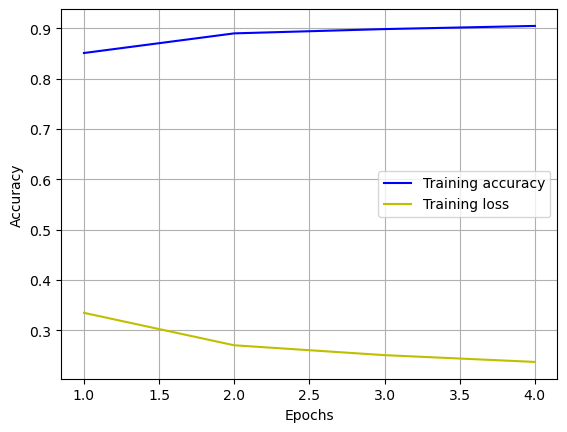

In [21]:
# Let's plot training and validation accuracy as well as loss.
def plot_history(history):
    accuracy = history.history['accuracy']
    loss = history.history['loss']
    epochs = range(1,len(accuracy) + 1)
    
    # Plot accuracy  
    plt.figure(1)
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
plot_history(history)

In [ ]:
#confusion matrix
y_pred = (model.predict(batched_test_dataset)[0][:, 0] > 0.5).astype("int8")
conf_matrix = tf.math.confusion_matrix(labels=Y_test, predictions=y_pred)
#SNS heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Make predictions

1/1 [==============================] - 0s 20ms/step
Our model says it is a : Positive!


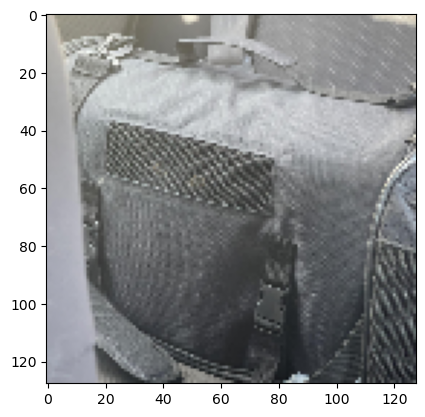

In [55]:
idx2 = random.randint(0, len(Y_test))

# print out prediction
y_pred = model.predict(X_test[idx2, :].reshape(1, 128, 128, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'Negative'
else:
    pred = 'Positive!'
    
print("Our model says it is a :", pred)

# plot image
idx2_X_train = np.float32(X_train[idx2, ...,::-1])
plt.imshow(idx2_X_train)
plt.show()